# Lab4: Predict Glucose variations with BigQuery AutoML ARIMA
### Supporting Diabetes research:  

BigQuery ML enables users to create and execute machine learning models in BigQuery using SQL queries. The goal is to democratize machine learning by enabling SQL practitioners to build models using their existing tools and to increase development speed by eliminating the need for data movement.
In this tutorial, you use the sample Covid19 dataset for BigQuery.
## Objectives
In this tutorial, you will use BigQuery to explore immunological data, AutoML to automatically generate ML model for peptide binding. Also, you will leverage BQML to explore vareous ML models and perform feature engineering:
+ BigQuery `ML.CREATE` to create a classification model using the `CREATE MODEL` statement
+ The `ML.EVALUATE` function to evaluate the ML model
+ Use `ML.TRANSFORM`feature engineering functions to improve model performance
+ The `ML.PREDICT` function to make predictions using the ML model

# AutoML ARIMA PLUS to explore time series model
Now as we explored Classification model, we might be interested to explore what other models can we used to make better prediction. 
GCP provide a service AutoML 
which allow scientist to submit their data and 
to explore vareous ML models.
+ [AutoML models](https://pantheon.corp.google.com/automl-tables/locations/us-central1/datasets/TBL8658818995480166400;modelId=TBL2508683113329065984;task=basic/schemav2?project=covid-19-271622) can be explored through GCP console
+ You can also call [AutoML from BQML](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-automl)


## Step 1: Explore Data
You can create GCP project and leverage public data set which provides free access to many datasets and free query processing. See more information [here](https://cloud.google.com/bigquery/public-data).

For our diabetes subset of data, let's examine data first:
+ Following query shows information about glucose variations.

In [ ]:
# Read GCP project id from env.
shell_output=!gcloud config list --format 'value(core.project)' 2>/dev/null
GCP_PROJECT_ID=shell_output[0]
print("GCP project ID:" + GCP_PROJECT_ID)

In [4]:
%%bigquery glucose --project $GCP_PROJECT_ID
SELECT 	DisplayTime, GlucoseValue  
FROM `covid-19-271622.diabetes.pbio2005143s010`
WHERE subjectId ='2133-001'
LIMIT 10

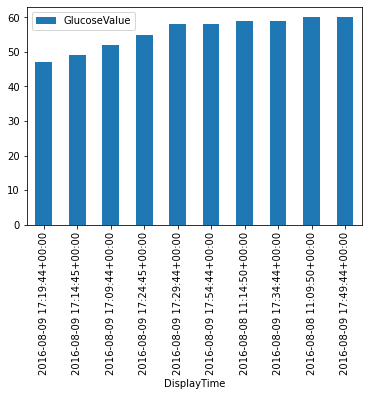

In [5]:
glucose.plot(kind='bar', x='DisplayTime', y='GlucoseValue');

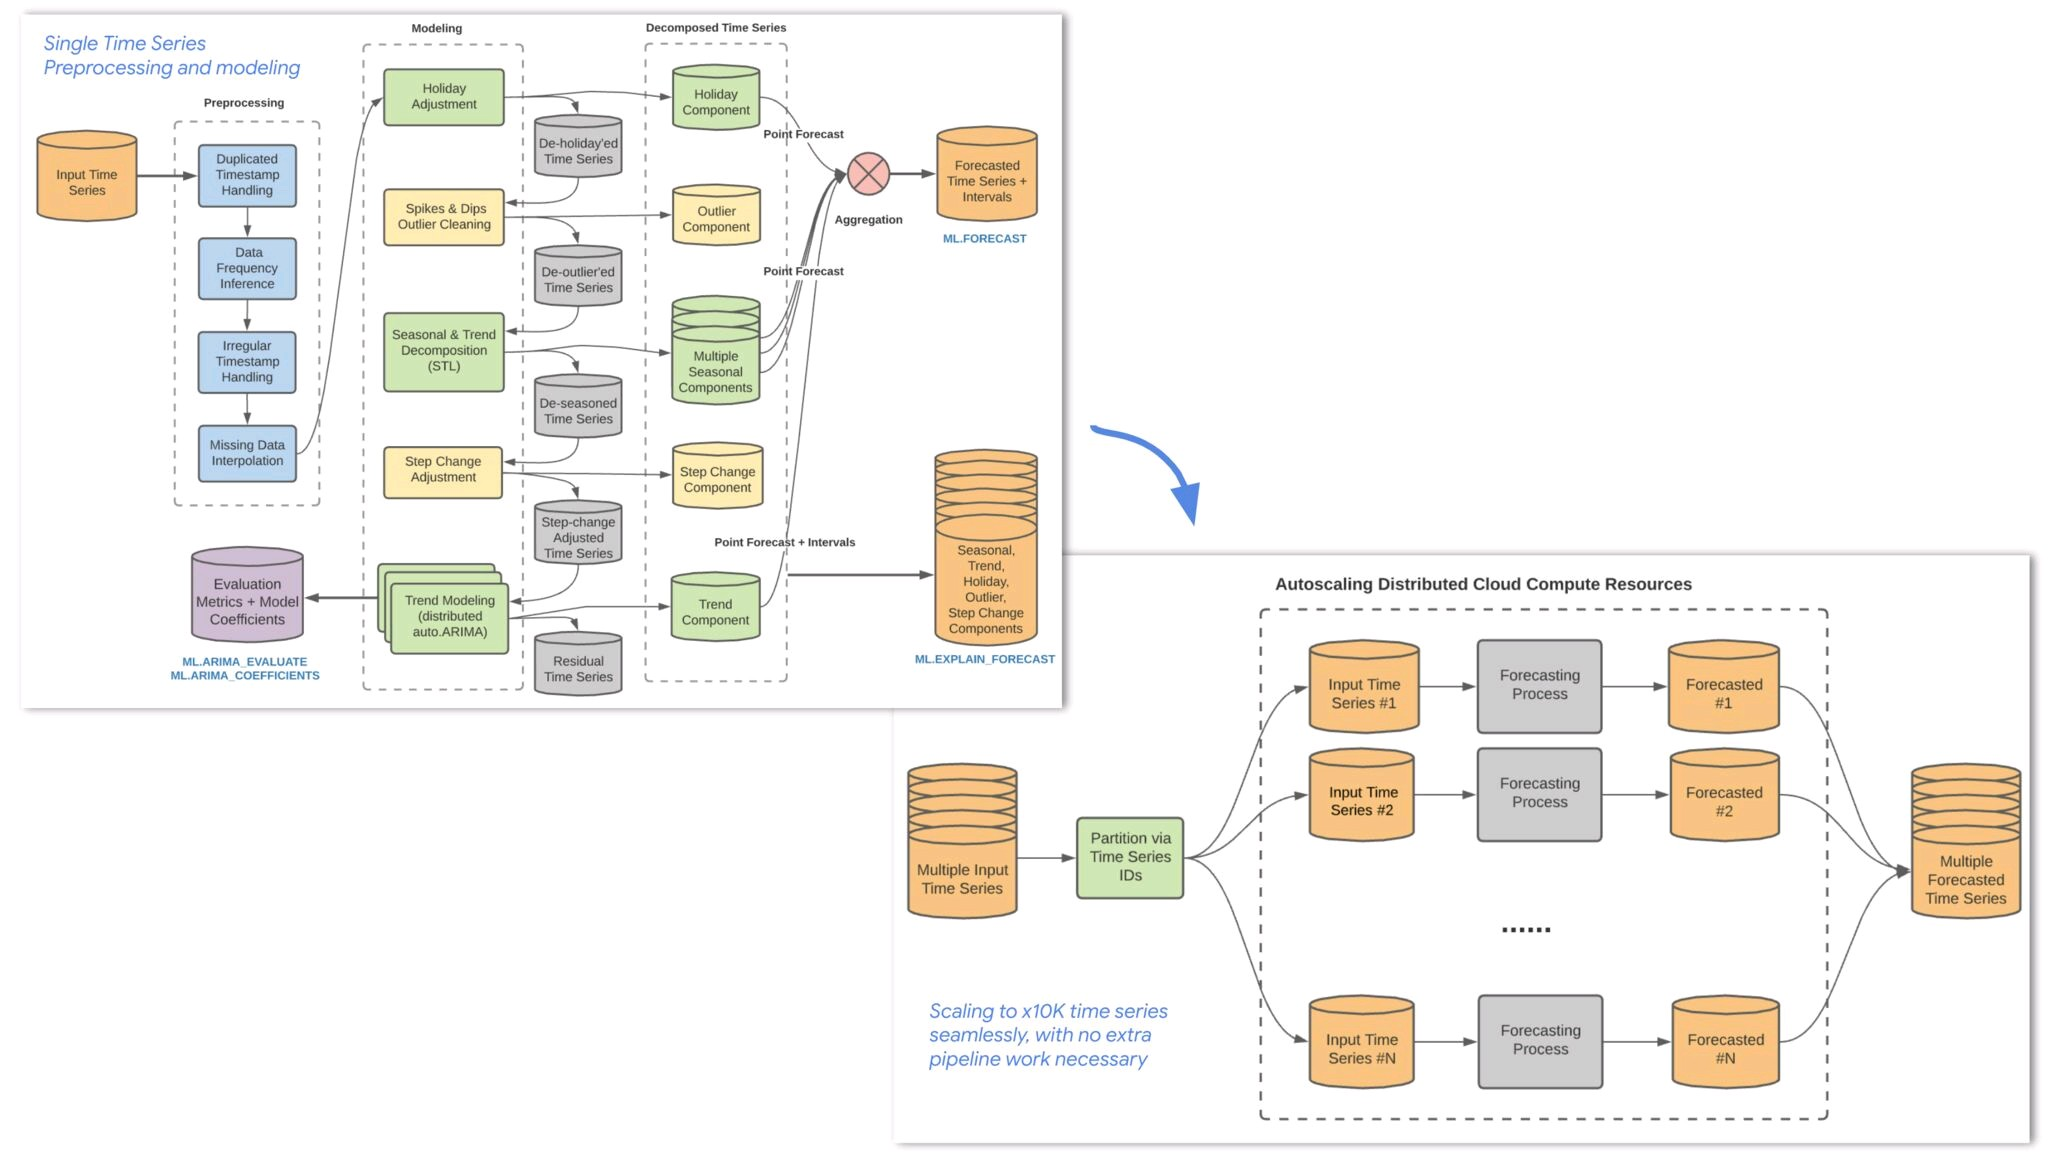

In [1]:
from IPython.display import Image
Image(filename='./arima.jpg', width = 500, height = 300) 

In [2]:
# Read GCP project id from env.
shell_output=!gcloud config list --format 'value(core.project)' 2>/dev/null
GCP_PROJECT_ID=shell_output[0]
print("GCP project ID:" + GCP_PROJECT_ID)

GCP project ID:covid-19-271622



# Leverage AutoML to build the model

Building ML models with BigQuery AutoML is as simple as writing SQL statements; makes ML modeling accessible to even SQL developers and analysts. We will create a model to predict for a given peptide if there is strong binding affinity with certain HLA Allele.

Following statement creates a classification model using logistic regression. We are selecting feature columns of Allele and peptide of specific mers to classify if a peptide is a good candidate for vaccine testing.

    Note: we are filtering data for peptides with length of 9 or 10 mers only. Also, since we run multiple samples, we are randomizing samples by 80% of data for learning.



In [3]:
%%bigquery --project $GCP_PROJECT_ID
CREATE MODEL `covid-19-271622.diabetes.glucoseforecast1`  
OPTIONS(model_type='ARIMA_PLUS', time_series_data_col='GlucoseValue', time_series_timestamp_col='DisplayTime', time_series_id_col = 'subjectId') 
      AS SELECT DisplayTime, GlucoseValue, subjectId FROM `covid-19-271622.diabetes.pbio2005143s010`;

""


### It will take an hour to run


# Evaluate your model

After creating your model, you evaluate the performance of the classifier using the ML.EVALUATE function. You can also use the ML.ROC_CURVE function for logistic regression specific metrics.

A classifier is one of a set of enumerated target values for a label. For example, in this tutorial you are using a classification model that detects one of the qualification class for peptide binding.

To run the ML.EVALUATE query that evaluates the model:


In [6]:
%%bigquery --project $GCP_PROJECT_ID
SELECT
 *
FROM
 ML.ARIMA_EVALUATE(MODEL `covid-19-271622.diabetes.glucoseforecast1`)

,subjectId,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods,has_holiday_effect,has_spikes_and_dips,has_step_changes,error_message
0,1636-69-001,3.0,1.0,2.0,False,224589.120219,-449166.240439,0.001472,[DAILY],False,False,True,
1,1636-69-026,3.0,0.0,2.0,False,-4678.362841,9370.725682,5.812894,[DAILY],False,False,False,
2,1636-69-028,3.0,2.0,1.0,False,8547.941455,-17085.882910,0.026614,"[DAILY, WEEKLY]",False,False,True,
3,1636-69-032,4.0,1.0,1.0,False,-4678.670196,9369.340392,11.167180,[DAILY],False,False,True,
4,1636-69-035,4.0,1.0,1.0,True,-6823.328578,13660.657156,4.272409,[DAILY],False,True,True,
5,1636-69-048,1.0,1.0,4.0,True,-4558.876098,9131.752196,9.739230,[NO_SEASONALITY],False,False,True,
6,1636-69-053,4.0,1.0,1.0,False,34765.098844,-69518.197688,0.026116,"[DAILY, WEEKLY]",False,False,True,
7,1636-69-060,3.0,1.0,2.0,False,-4615.959227,9243.918454,7.408583,[DAILY],False,True,False,
8,1636-69-064,5.0,1.0,0.0,False,-4784.785863,9581.571725,20.459526,[NO_SEASONALITY],False,False,False,
9,1636-69-069,3.0,1.0,2.0,False,-3867.456416,7746.912831,0.191562,[DAILY],False,False,True,


In [7]:
%%bigquery --project $GCP_PROJECT_ID
SELECT
 *
FROM
 ML.ARIMA_COEFFICIENTS(MODEL `covid-19-271622.diabetes.glucoseforecast1`)

,subjectId,ar_coefficients,ma_coefficients,intercept_or_drift
0,1636-69-001,[],"[0.5748233785560146, 0.8979520973994236]",0.000000
1,1636-69-026,[],"[0.7368027835595755, -0.1975817835520073]",114.589188
2,1636-69-028,[],[-0.9995723955256244],0.000000
3,1636-69-032,[],[-0.8777947083266472],0.000000
4,1636-69-035,[],[-0.9998271257394207],-0.006151
5,1636-69-048,[],"[-0.5888403694385508, -0.1936235869678395, -0....",-0.012940
6,1636-69-053,[],[0.9558004913144845],0.000000
7,1636-69-060,[],"[-0.16702745599619973, -0.8102777409592087]",0.000000
8,1636-69-064,[],[],0.000000
9,1636-69-069,[],"[-0.9419767050584662, 0.49896970786407674]",0.000000


# You can check vareous models explored by AutoML 
+ AutoML keep [log](https://pantheon.corp.google.com/automl-tables/locations/us-central1/datasets/TBL8658818995480166400;modelId=TBL2508683113329065984;task=basic/train?project=covid-19-271622) of all model configurations it explored
+ [Models](https://pantheon.corp.google.com/logs/query;query=resource.type%3D%22cloudml_job%22%20resource.labels.job_id%3D%22TBL2508683113329065984%22%20resource.labels.project_id%3D%22covid-19-271622%22%20labels.log_type%3D%22automl_tables%22%20jsonPayload.%22@type%22%3D%22type.googleapis.com%2Fgoogle.cloud.automl.master.TablesModelStructure%22?project=covid-19-271622)
+ [Trials](https://pantheon.corp.google.com/logs/query;query=resource.type%3D%22cloudml_job%22%20resource.labels.job_id%3D%22TBL2508683113329065984%22%20resource.labels.project_id%3D%22covid-19-271622%22%20labels.log_type%3D%22automl_tables%22%20jsonPayload.%22@type%22%3D%22type.googleapis.com%2Fgoogle.cloud.automl.master.TuningTrial%22?project=covid-19-271622)


# Run Prediction on BQML Model

Now that you have evaluated your model, the next step is to use it to predict outcomes.

To run the query that uses the model to predict the number of transactions: Following example demonstrate leveraging BQ model for prediction. Optionally, you can export model and publish it on to Google AI Platform for serving prediction.


In [10]:
%%bigquery --project $GCP_PROJECT_ID
SELECT
 *
FROM
 ML.FORECAST(MODEL `covid-19-271622.diabetes.glucoseforecast1`, STRUCT(3 AS horizon, 0.8 AS confidence_level))

,subjectId,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
0,1636-69-001,2015-04-02 15:12:05+00:00,120.879246,0.038371,0.8,120.830043,120.928449,120.830043,120.928449
1,1636-69-001,2015-04-02 15:17:05+00:00,121.729089,0.062419,0.8,121.649050,121.809128,121.649050,121.809128
2,1636-69-001,2015-04-02 15:22:05+00:00,119.975372,0.084993,0.8,119.866387,120.084357,119.866387,120.084357
3,1636-69-026,2015-12-01 02:07:02+00:00,86.510149,2.410994,0.8,83.418563,89.601735,83.418563,89.601735
4,1636-69-026,2015-12-01 02:12:02+00:00,88.652491,4.282193,0.8,83.161492,94.143489,83.161492,94.143489
...,...,...,...,...,...,...,...,...,...
163,2133-040,2017-07-05 00:24:36+00:00,102.722901,3.774509,0.8,97.882899,107.562904,97.882899,107.562904
164,2133-040,2017-07-05 00:29:36+00:00,99.852603,5.156445,0.8,93.240563,106.464644,93.240563,106.464644
165,2133-041,2017-07-11 20:42:05+00:00,69.222090,2.847511,0.8,65.570765,72.873415,65.570765,72.873415
166,2133-041,2017-07-11 20:47:05+00:00,72.046216,5.099935,0.8,65.506638,78.585795,65.506638,78.585795
